In [63]:
import numpy as np
import pandas as pd
import os
import matplotlib.ticker as mticker


In [64]:
#### FOR GPS TRAjectories

In [65]:


#base_dir = '/Users/shafizurrahmanseeam/Desktop/T-drive/Perturbed/Laplace'  # Replace with your base directory
#base_dir = '/Users/shafizurrahmanseeam/Desktop/T-drive/Perturbed/Laplace'  # Replace with your base directory
#base_dir = '/Users/shafizurrahmanseeam/Desktop/T-drive/Perturbed/Laplace'  # Replace with your base directory

base_dir = "C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\laplace"  # Replace with your base directory

# Initialize dictionaries to store the metrics
mean_l2_distances_laplace = {}
mean_l1_distances_laplace = {}

# List all relevant files (assuming CSV format)
files = sorted([f for f in os.listdir(base_dir) if f.endswith('.csv')])

# Load each file, calculate metrics, and store them
for file in files:
    # Full path to file
    file_path = os.path.join(base_dir, file)
    
    # Load the DataFrame
    df = pd.read_csv(file_path)
    
    # Store the mean of 'Distance(meters)'
   # mean_l2_distances_laplace[file] = df.groupby('identifier')['l2_distance'].mean().mean()
    mean_l2_distances_laplace[file] = df['l2_distance'].mean()
    
    # Store the mean of 'l1distance' after grouping by 'identifier'
    #mean_l1_distances_laplace[file] = df.groupby('identifier')['l1_distance'].mean().mean()
    mean_l1_distances_laplace[file] = df['l1_distance'].mean()



In [67]:




#base_dir = '/Users/shafizurrahmanseeam/Desktop/T-drive/Perturbed/Staircase'  # Replace with your base directory

base_dir = "C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\staircase"  # Replace with your base directory

# Initialize dictionaries to store the metrics
mean_l2_distances_staircase = {}
mean_l1_distances_staircase = {}

# List all relevant files (assuming CSV format)
files = sorted([f for f in os.listdir(base_dir) if f.endswith('.csv')])

# Load each file, calculate metrics, and store them
for file in files:
    # Full path to file
    file_path = os.path.join(base_dir, file)
    
    # Load the DataFrame
    df = pd.read_csv(file_path)
    
    # Store the mean of 'Distance(meters)'
   # mean_l2_distances_laplace[file] = df.groupby('identifier')['l2_distance'].mean().mean()
    mean_l2_distances_staircase[file] = df['l2_distance'].mean()
    
    # Store the mean of 'l1distance' after grouping by 'identifier'
    #mean_l1_distances_laplace[file] = df.groupby('identifier')['l1_distance'].mean().mean()
    mean_l1_distances_staircase[file] = df['l1_distance'].mean()

In [68]:
#base_dir = '/Users/shafizurrahmanseeam/Desktop/T-drive/Perturbed/Our_bl_50_delta_5'  # Replace with your base directory

base_dir = "C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\our_bl_50_delta_5"  # Replace with your base directory


# Initialize dictionaries to store the metrics
mean_l2_distances_our_bl_50_delta_5 = {}
mean_l1_distances_our_bl_50_delta_5 = {}

# List all relevant files (assuming CSV format)
files = sorted([f for f in os.listdir(base_dir) if f.endswith('.csv')])

# Load each file, calculate metrics, and store them
for file in files:
    # Full path to file
    file_path = os.path.join(base_dir, file)
    
    # Load the DataFrame
    df = pd.read_csv(file_path)
    
    # Store the mean of 'Distance(meters)'
   # mean_l2_distances_laplace[file] = df.groupby('identifier')['l2_distance'].mean().mean()
    mean_l2_distances_our_bl_50_delta_5[file] = df['l2_distance'].mean()
    
    # Store the mean of 'l1distance' after grouping by 'identifier'
    #mean_l1_distances_laplace[file] = df.groupby('identifier')['l1_distance'].mean().mean()
    mean_l1_distances_our_bl_50_delta_5[file] = df['l1_distance'].mean()

In [70]:
#base_dir = '/Users/shafizurrahmanseeam/Desktop/T-drive/Perturbed/LaplaceDelta5'  # Replace with your base directory
base_dir = "C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\perturbed\\laplace_delta_5"  # Replace with your base directory

# Initialize dictionaries to store the metrics
mean_l2_distances_laplace_delta_5 = {}
mean_l1_distances_laplace_delta_5 = {}

# List all relevant files (assuming CSV format)
files = sorted([f for f in os.listdir(base_dir) if f.endswith('.csv')])

# Load each file, calculate metrics, and store them
for file in files:
    # Full path to file
    file_path = os.path.join(base_dir, file)
    
    # Load the DataFrame
    df = pd.read_csv(file_path)
    
    # Store the mean of 'Distance(meters)'
   # mean_l2_distances_laplace[file] = df.groupby('identifier')['l2_distance'].mean().mean()
    mean_l2_distances_laplace_delta_5[file] = df['l2_distance'].mean()
    
    # Store the mean of 'l1distance' after grouping by 'identifier'
    #mean_l1_distances_laplace[file] = df.groupby('identifier')['l1_distance'].mean().mean()
    mean_l1_distances_laplace_delta_5[file] = df['l1_distance'].mean()

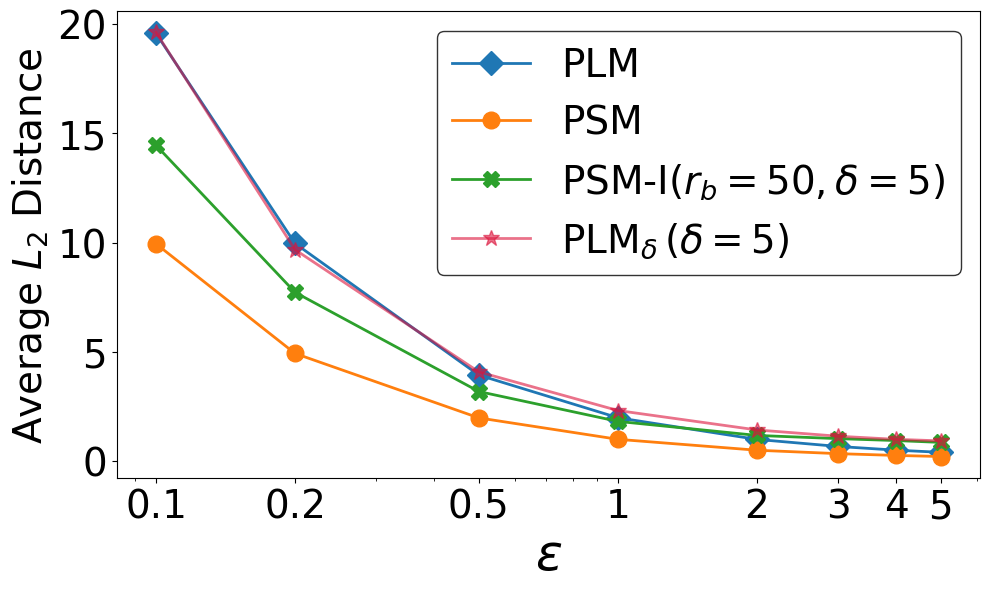

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
epsilon_values = [0.1, 0.2, 0.5, 1,2,3,4,5]

# Define lines
# Define lines with adjusted labels
line1 = {'x': epsilon_values, 'y': list(mean_l2_distances_laplace.values()), 'label': r'PLM', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': list(mean_l2_distances_staircase.values()), 'label': 'PSM', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': list(mean_l2_distances_our_bl_50_delta_5.values()), 'label': 'PSM-I$(r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': list(mean_l2_distances_laplace_delta_5.values()), 'label': r'PLM$_{\delta}\,(\delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)

# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('$\epsilon$', fontsize=36)
plt.ylabel('Average $L_2$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
#plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()

# Saving the plot as a high-definition PNG
pathpng = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\png\\uci_l2_distance'

plt.savefig(pathpng, dpi=300, bbox_inches='tight')

#Saving the plot as an SVG
pathsvg = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\svg\\uci_l2_distance'
plt.savefig(pathsvg, format='svg', bbox_inches='tight')
# Display the plot
plt.show()

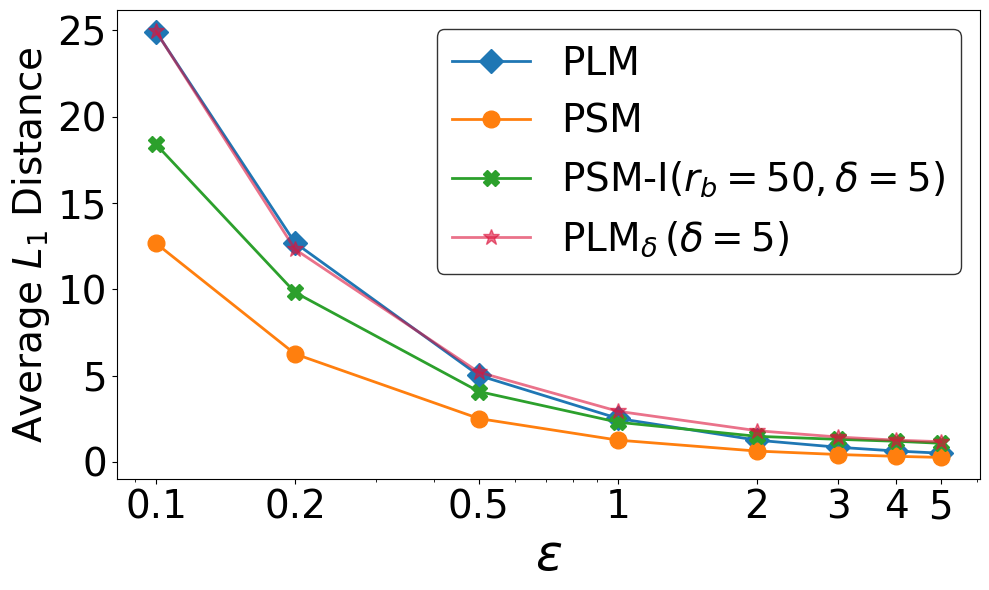

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
epsilon_values = [0.1, 0.2, 0.5, 1,2,3,4,5]

# Define lines with adjusted labels
line1 = {'x': epsilon_values, 'y': list(mean_l1_distances_laplace.values()), 'label': r'PLM', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': list(mean_l1_distances_staircase.values()), 'label': 'PSM', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': list(mean_l1_distances_our_bl_50_delta_5.values()), 'label': 'PSM-I$(r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': list(mean_l1_distances_laplace_delta_5.values()), 'label': r'PLM$_{\delta}\,(\delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}
#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)

# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('$\epsilon$', fontsize=36)
plt.ylabel('Average $L_1$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
#plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()

# Saving the plot as a high-definition PNG
pathpng = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\png\\uci_l1_distance'

plt.savefig(pathpng, dpi=300, bbox_inches='tight')

#Saving the plot as an SVG
pathsvg = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\uci\\figure\\svg\\uci_l2_distance'
plt.savefig(pathsvg, format='svg', bbox_inches='tight')
# Display the plot
plt.show()

In [1]:
###########################################################################################


In [2]:
#############                      Tdrive   ######################

In [ ]:


#base_dir = '/Users/shafizurrahmanseeam/Desktop/T-drive/Perturbed/Laplace'  # Replace with your base directory
#base_dir = '/Users/shafizurrahmanseeam/Desktop/T-drive/Perturbed/Laplace'  # Replace with your base directory
#base_dir = '/Users/shafizurrahmanseeam/Desktop/T-drive/Perturbed/Laplace'  # Replace with your base directory

base_dir = "C:\\Users\\ss6365\\Desktop\\location_privacy_final\\tdrive\\perturbed\\laplace"  # Replace with your base directory

# Initialize dictionaries to store the metrics
mean_l2_distances_laplace = {}
mean_l1_distances_laplace = {}

# List all relevant files (assuming CSV format)
files = sorted([f for f in os.listdir(base_dir) if f.endswith('.csv')])

# Load each file, calculate metrics, and store them
for file in files:
    # Full path to file
    file_path = os.path.join(base_dir, file)
    
    # Load the DataFrame
    df = pd.read_csv(file_path)
    
    # Store the mean of 'Distance(meters)'
   # mean_l2_distances_laplace[file] = df.groupby('identifier')['l2_distance'].mean().mean()
    mean_l2_distances_laplace[file] = df['l2_distance'].mean()
    
    # Store the mean of 'l1distance' after grouping by 'identifier'
    #mean_l1_distances_laplace[file] = df.groupby('identifier')['l1_distance'].mean().mean()
    mean_l1_distances_laplace[file] = df['l1_distance'].mean()



In [ ]:




#base_dir = '/Users/shafizurrahmanseeam/Desktop/T-drive/Perturbed/Staircase'  # Replace with your base directory

base_dir = "C:\\Users\\ss6365\\Desktop\\location_privacy_final\\tdrive\\perturbed\\staircase"  # Replace with your base directory

# Initialize dictionaries to store the metrics
mean_l2_distances_staircase = {}
mean_l1_distances_staircase = {}

# List all relevant files (assuming CSV format)
files = sorted([f for f in os.listdir(base_dir) if f.endswith('.csv')])

# Load each file, calculate metrics, and store them
for file in files:
    # Full path to file
    file_path = os.path.join(base_dir, file)
    
    # Load the DataFrame
    df = pd.read_csv(file_path)
    
    # Store the mean of 'Distance(meters)'
   # mean_l2_distances_laplace[file] = df.groupby('identifier')['l2_distance'].mean().mean()
    mean_l2_distances_staircase[file] = df['l2_distance'].mean()
    
    # Store the mean of 'l1distance' after grouping by 'identifier'
    #mean_l1_distances_laplace[file] = df.groupby('identifier')['l1_distance'].mean().mean()
    mean_l1_distances_staircase[file] = df['l1_distance'].mean()

In [ ]:
#base_dir = '/Users/shafizurrahmanseeam/Desktop/T-drive/Perturbed/Our_bl_50_delta_5'  # Replace with your base directory

base_dir = "C:\\Users\\ss6365\\Desktop\\location_privacy_final\\tdrive\\perturbed\\our_bl_50_delta_5"  # Replace with your base directory


# Initialize dictionaries to store the metrics
mean_l2_distances_our_bl_50_delta_5 = {}
mean_l1_distances_our_bl_50_delta_5 = {}

# List all relevant files (assuming CSV format)
files = sorted([f for f in os.listdir(base_dir) if f.endswith('.csv')])

# Load each file, calculate metrics, and store them
for file in files:
    # Full path to file
    file_path = os.path.join(base_dir, file)
    
    # Load the DataFrame
    df = pd.read_csv(file_path)
    
    # Store the mean of 'Distance(meters)'
   # mean_l2_distances_laplace[file] = df.groupby('identifier')['l2_distance'].mean().mean()
    mean_l2_distances_our_bl_50_delta_5[file] = df['l2_distance'].mean()
    
    # Store the mean of 'l1distance' after grouping by 'identifier'
    #mean_l1_distances_laplace[file] = df.groupby('identifier')['l1_distance'].mean().mean()
    mean_l1_distances_our_bl_50_delta_5[file] = df['l1_distance'].mean()

In [ ]:
#base_dir = '/Users/shafizurrahmanseeam/Desktop/T-drive/Perturbed/LaplaceDelta5'  # Replace with your base directory
base_dir = "C:\\Users\\ss6365\\Desktop\\location_privacy_final\\tdrive\\perturbed\\laplace_delta_5"  # Replace with your base directory

# Initialize dictionaries to store the metrics
mean_l2_distances_laplace_delta_5 = {}
mean_l1_distances_laplace_delta_5 = {}

# List all relevant files (assuming CSV format)
files = sorted([f for f in os.listdir(base_dir) if f.endswith('.csv')])

# Load each file, calculate metrics, and store them
for file in files:
    # Full path to file
    file_path = os.path.join(base_dir, file)
    
    # Load the DataFrame
    df = pd.read_csv(file_path)
    
    # Store the mean of 'Distance(meters)'
   # mean_l2_distances_laplace[file] = df.groupby('identifier')['l2_distance'].mean().mean()
    mean_l2_distances_laplace_delta_5[file] = df['l2_distance'].mean()
    
    # Store the mean of 'l1distance' after grouping by 'identifier'
    #mean_l1_distances_laplace[file] = df.groupby('identifier')['l1_distance'].mean().mean()
    mean_l1_distances_laplace_delta_5[file] = df['l1_distance'].mean()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
epsilon_values = [0.1, 0.2, 0.5, 1,2,3,4,5]

# Define lines
# Define lines with adjusted labels
line1 = {'x': epsilon_values, 'y': list(mean_l2_distances_laplace.values()), 'label': r'PLM', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': list(mean_l2_distances_staircase.values()), 'label': 'PSM', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': list(mean_l2_distances_our_bl_50_delta_5.values()), 'label': 'PSM-I$(r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': list(mean_l2_distances_laplace_delta_5.values()), 'label': r'PLM$_{\delta}\,(\delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)

# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('$\epsilon$', fontsize=36)
plt.ylabel('Average $L_2$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
#plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()

# Saving the plot as a high-definition PNG
pathpng = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\tdrive\\figure\\png\\tdrive_l2_distance'

plt.savefig(pathpng, dpi=300, bbox_inches='tight')

#Saving the plot as an SVG
pathsvg = 'C:\\Users\\ss6365\\Desktop\\location_privacy_final\\tdrive\\figure\\svg\\tdrive_l2_distance'
plt.savefig(pathsvg, format='svg', bbox_inches='tight')
# Display the plot
plt.show()